In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
from glob import glob

import numpy as np
import pandas as pd

import settings as conf
import metadata

# fastENLOC no shrinkage

In [3]:
fastenloc_old = pd.read_pickle('/mnt/phenomexcan_base/gene_assoc/fastenloc_v1/fastenloc-torus-rcp.pkl.xz')

In [4]:
fastenloc_old.shape

(37967, 4091)

In [5]:
fastenloc_old.size

155322997

In [6]:
fastenloc_old.head()

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,2.173200e-07,0.000036,1.020227e-10,0.000020,0.001497,3.426770e-11,1.312300e-10,1.508600e-09,1.114500e-05,4.164600e-09,...,0.001,NaN,0.000,0.0,NaN,0.001,NaN,NaN,NaN,0.0
ENSG00000000457,1.343900e-06,0.000692,8.216060e-11,0.000089,0.004363,1.342669e-10,4.223476e-10,2.036232e-08,4.598924e-04,3.570850e-08,...,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
ENSG00000000460,8.757750e-06,0.001713,1.119010e-10,0.000016,0.003566,1.533228e-10,3.712300e-10,6.505700e-09,1.830200e-05,6.002900e-08,...,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
ENSG00000000938,7.197000e-08,0.000446,3.573442e-10,0.000006,0.004429,2.588022e-08,3.461500e-10,9.110200e-09,1.351400e-05,9.878000e-09,...,0.263,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0
ENSG00000000971,2.720000e-07,0.000310,1.397300e-10,0.000182,0.003160,3.940395e-11,1.785600e-10,2.329954e-10,5.325000e-07,4.958740e-08,...,0.000,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.0


In [7]:
fastenloc_old.isna().sum().sum()

3341082

# fastENLOC shrinkage

In [8]:
fastenloc_new = pd.read_pickle('/mnt/phenomexcan_base/gene_assoc/fastenloc-torus-rcp.pkl.xz')

In [9]:
fastenloc_new.shape

(38062, 4091)

In [10]:
fastenloc_new.size

155711642

In [11]:
fastenloc_new.head()

,O46-Diagnoses_main_ICD10_O46_Antepartum_haemorrhage_not_elsewhere_classified,K30-Diagnoses_main_ICD10_K30_Dyspepsia,2907-Ever_stopped_smoking_for_6_months,H7_DIPLOPIA-Diplopia,1538_0-Major_dietary_changes_in_the_last_5_years_No,5663-Length_of_longest_manicirritable_episode,20002_1538-Noncancer_illness_code_selfreported_arthritis_nos,S30-Diagnoses_main_ICD10_S30_Superficial_injury_of_abdomen_lower_back_and_pelvis,24010_raw-Inverse_distance_to_the_nearest_road,3143_raw-Ankle_spacing_width,...,2237-Plays_computer_games,20002_1461-Noncancer_illness_code_selfreported_inflammatory_bowel_disease,20002_1508-Noncancer_illness_code_selfreported_jaundice_unknown_cause,20003_1140881882-Treatmentmedication_code_timoptol_025_eye_drops,22601_71253330-Job_coding_merchandiser_window_dresser,23112_raw-Leg_fat_mass_right,20003_1140861778-Treatmentmedication_code_dipyridamole,20003_1199-Treatmentmedication_code_food_supplementplantherbal_extract,1309-Fresh_fruit_intake,100920_2105-Type_milk_consumed_soya_with_calcium
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,NaN,NaN,NaN,NaN,0.001213,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002131,NaN
ENSG00000000457,NaN,NaN,NaN,NaN,0.001873,NaN,NaN,NaN,NaN,0.017720,...,0.068852,NaN,NaN,NaN,NaN,0.003383,NaN,NaN,0.009195,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,0.002620,NaN,NaN,0.000207,NaN,0.000105,...,0.093284,NaN,NaN,NaN,NaN,0.008790,NaN,NaN,0.003105,NaN
ENSG00000000938,NaN,NaN,NaN,NaN,0.002928,NaN,NaN,NaN,0.000762,0.012773,...,0.004300,NaN,NaN,0.000424,NaN,0.000612,NaN,NaN,0.003240,NaN
ENSG00000000971,NaN,NaN,NaN,NaN,0.002858,NaN,NaN,NaN,NaN,0.019304,...,0.005419,NaN,NaN,NaN,NaN,0.007427,NaN,NaN,0.004804,NaN


In [12]:
fastenloc_new.isna().sum().sum()

130860350

# Plots

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import plots

In [15]:
fe_old_values = fastenloc_old.unstack().fillna(0.0)

In [16]:
fe_old_values.dtype

dtype('float64')

In [17]:
fe_old_values.shape

(155322997,)

In [18]:
fe_old_values.head()

                                                  gene_id        
20096_1-Size_of_red_wine_glass_drunk_small_125ml  ENSG00000000419    2.173200e-07
                                                  ENSG00000000457    1.343900e-06
                                                  ENSG00000000460    8.757750e-06
                                                  ENSG00000000938    7.197000e-08
                                                  ENSG00000000971    2.720000e-07
dtype: float64

In [19]:
fe_old_values.describe().apply(str)

count               155322997.0
mean       0.001390020637883703
std        0.018345057584400835
min                         0.0
25%                  5.6814e-11
50%      2.3010000000000002e-08
75%                   6.419e-05
max                    2.661831
dtype: object

In [20]:
fe_old_values[fe_old_values > 0.1].shape

(367307,)

In [21]:
fe_new_values = fastenloc_new.unstack().fillna(0.0)

In [22]:
fe_new_values.dtype

dtype('float64')

In [23]:
fe_new_values.shape

(155711642,)

In [24]:
fe_new_values.head()

                                                                              gene_id        
O46-Diagnoses_main_ICD10_O46_Antepartum_haemorrhage_not_elsewhere_classified  ENSG00000000419    0.0
                                                                              ENSG00000000457    0.0
                                                                              ENSG00000000460    0.0
                                                                              ENSG00000000938    0.0
                                                                              ENSG00000000971    0.0
dtype: float64

In [25]:
fe_new_values.describe().apply(str)

count              155711642.0
mean     0.0011469481052033333
std       0.017107796517451552
min                        0.0
25%                        0.0
50%                        0.0
75%                        0.0
max                  2.4696036
dtype: object

In [26]:
fe_new_values[fe_new_values > 0.1].shape

(322824,)

In [27]:
del fastenloc_old, fastenloc_new

## All_RCP > 0.1

In [28]:
fe_new_values_selected = fe_new_values[fe_new_values > 0.1]

In [29]:
fe_new_values_selected.shape

(322824,)

In [30]:
fe_old_values_selected = fe_old_values[fe_old_values > 0.1]

In [31]:
fe_old_values_selected.shape

(367307,)

In [32]:
df = pd.DataFrame(data={'fastENLOC (no shrinkage)': fe_old_values_selected, 'fastENLOC (shrinkage)': fe_new_values_selected}).dropna()

In [33]:
df.shape

(313730, 2)

In [34]:
df.describe()

,fastENLOC (no shrinkage),fastENLOC (shrinkage)
count,313730.000000,313730.000000
mean,0.327504,0.300413
std,0.220524,0.216165
min,0.100003,0.100000
25%,0.162601,0.141800
50%,0.248193,0.218603
75%,0.425300,0.386847
max,2.661831,2.469604


### Scatter plot

Text(0.5, 1.0, 'FE_S and FE_noS RCP > 0.1\nNumber of points: 313730')

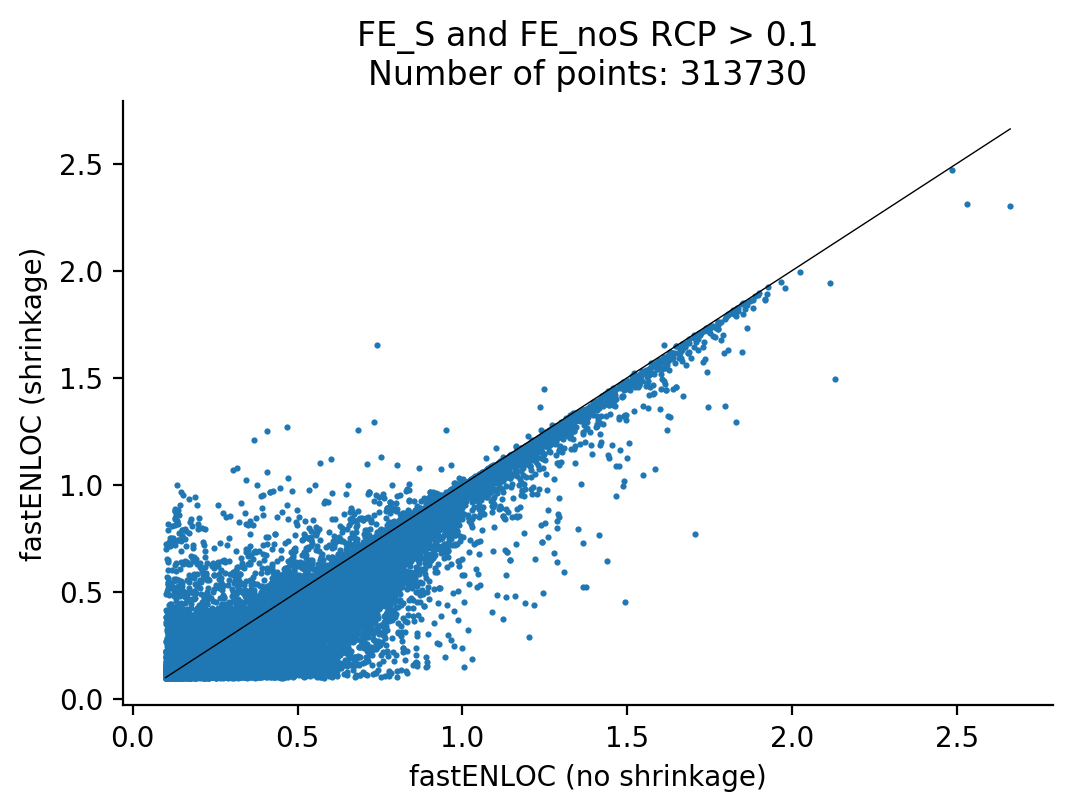

In [35]:
ax = plots.scatterplot(df, 'fastENLOC (no shrinkage)', 'fastENLOC (shrinkage)', s=5, linewidth=0)
ax.set_title(f'FE_S and FE_noS RCP > 0.1\nNumber of points: {df.shape[0]}')

### Hexbin plot

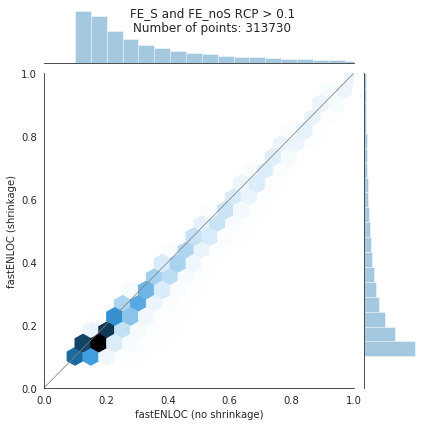

In [39]:
with sns.axes_style("white"):
    ax = sns.jointplot(data=df, x='fastENLOC (no shrinkage)', y='fastENLOC (shrinkage)', kind='hex')
    ax.ax_joint.set_xlim([0, 1])
    ax.ax_joint.set_ylim([0, 1])
    ax.ax_joint.plot([0.0, 1.0], [0.0, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'FE_S and FE_noS RCP > 0.1\nNumber of points: {df.shape[0]}')

### Density plot

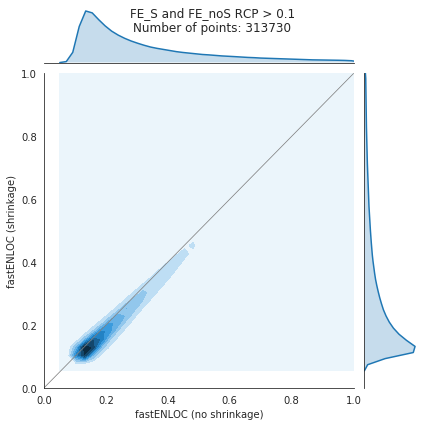

In [40]:
with sns.axes_style("white"):
    ax = sns.jointplot(data=df, x='fastENLOC (no shrinkage)', y='fastENLOC (shrinkage)', kind='kde')
    ax.ax_joint.set_xlim([0, 1])
    ax.ax_joint.set_ylim([0, 1])
    ax.ax_joint.plot([0.0, 1.0], [0.0, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'FE_S and FE_noS RCP > 0.1\nNumber of points: {df.shape[0]}')

## New_RCP > 0.1 AND Old_RCP < 0.10

In [41]:
fe_new_values_selected = fe_new_values[fe_new_values >= 0.1]

In [42]:
fe_new_values_selected.shape

(322824,)

In [43]:
fe_old_values_selected = fe_old_values.loc[fe_old_values.index.intersection(fe_new_values_selected.index)]

In [44]:
fe_old_values_selected = fe_old_values_selected[fe_old_values_selected < 0.1]

In [45]:
fe_old_values_selected.shape

(8906,)

In [46]:
df = pd.DataFrame(data={'fastENLOC (no shrinkage)': fe_old_values_selected, 'fastENLOC (shrinkage)': fe_new_values_selected}).dropna()

In [47]:
df.shape

(8906, 2)

In [48]:
df.describe()

,fastENLOC (no shrinkage),fastENLOC (shrinkage)
count,8906.000000,8906.000000
mean,0.025546,0.224865
std,0.030309,0.166503
min,0.000000,0.100037
25%,0.001893,0.120400
50%,0.010668,0.159137
75%,0.042673,0.256436
max,0.099930,1.050720


### Scatter plot

Text(0.5, 1.0, 'FE_S RCP >= 0.1 and FE_noS RCP < 0.1\nNumber of points: 8906')

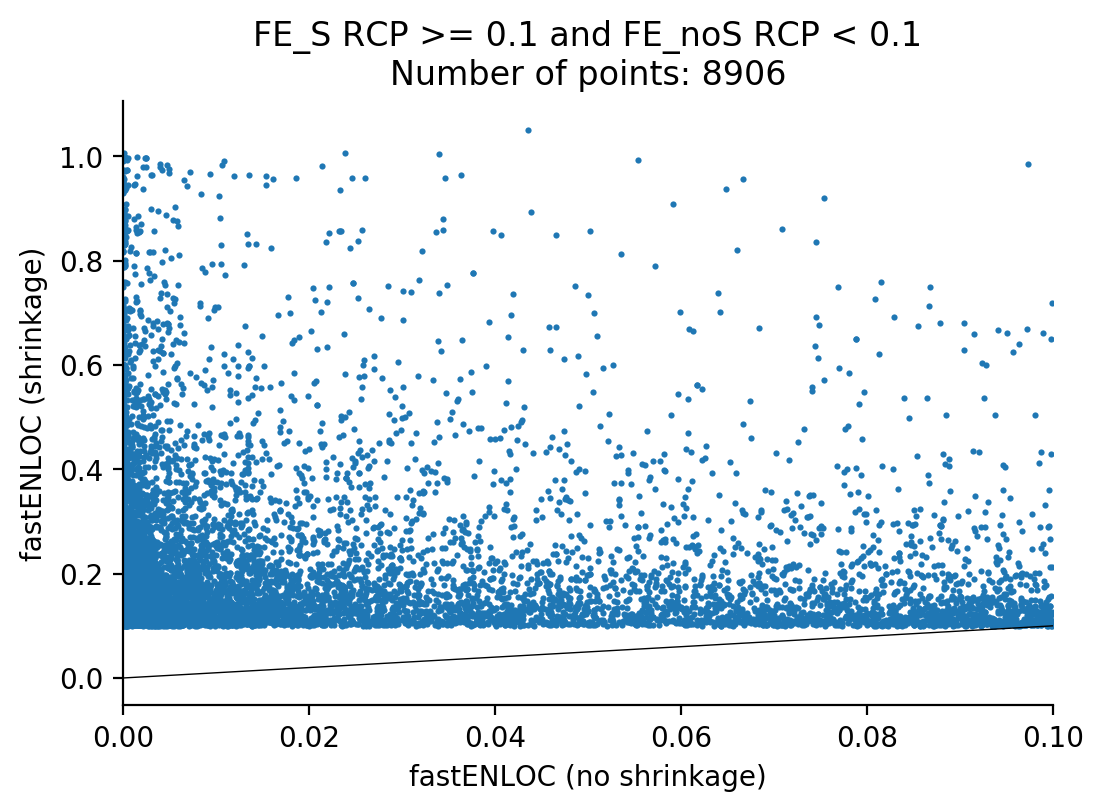

In [51]:
ax = plots.scatterplot(df, 'fastENLOC (no shrinkage)', 'fastENLOC (shrinkage)', s=5, linewidth=0)
ax.set_xlim([0, 0.1])
ax.set_title(f'FE_S RCP >= 0.1 and FE_noS RCP < 0.1\nNumber of points: {df.shape[0]}')

### Hexbin plot

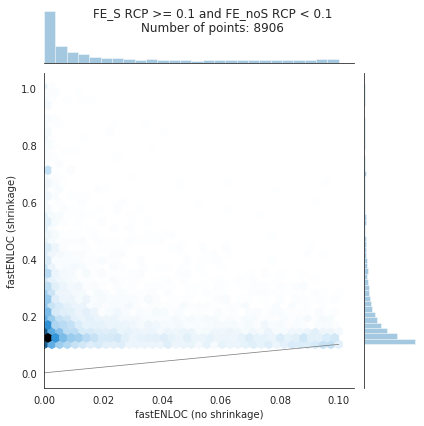

In [52]:
with sns.axes_style("white"):
    ax = sns.jointplot(data=df, x='fastENLOC (no shrinkage)', y='fastENLOC (shrinkage)', kind='hex')
    ax.ax_joint.plot([0.0, 0.1], [0.0, 0.1], 'gray', linewidth=0.75)
    
    ax.fig.suptitle(f'FE_S RCP >= 0.1 and FE_noS RCP < 0.1\nNumber of points: {df.shape[0]}')

## Old_RCP > 0.1 AND New_RCP < 0.10

In [53]:
fe_old_values_selected = fe_old_values[fe_old_values >= 0.1]

In [54]:
fe_old_values_selected.shape

(367381,)

In [55]:
fe_new_values_selected = fe_new_values.loc[fe_new_values.index.intersection(fe_old_values_selected.index)]

In [56]:
fe_new_values_selected = fe_new_values_selected[fe_new_values_selected < 0.1]

In [57]:
fe_new_values_selected.shape

(53532,)

In [58]:
df = pd.DataFrame(data={'fastENLOC (no shrinkage)': fe_old_values_selected, 'fastENLOC (shrinkage)': fe_new_values_selected}).dropna()

In [59]:
df.shape

(53532, 2)

In [60]:
df.describe()

,fastENLOC (no shrinkage),fastENLOC (shrinkage)
count,53532.000000,53532.000000
mean,0.132532,0.075351
std,0.061600,0.025951
min,0.100000,0.000000
25%,0.105074,0.065352
50%,0.112713,0.085719
75%,0.132102,0.094260
max,1.452854,0.099997


### Scatter plot

Text(0.5, 1.0, 'FE_S RCP < 0.1 and FE_noS RCP >= 0.1\nNumber of points: 53532')

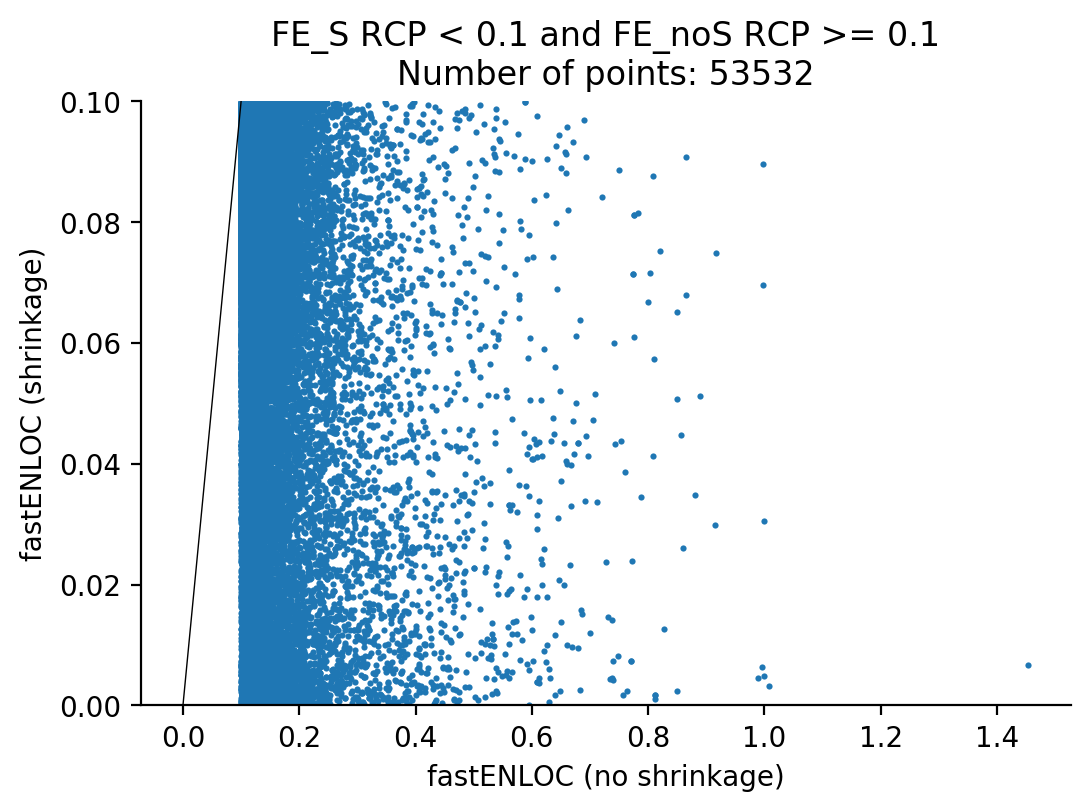

In [62]:
ax = plots.scatterplot(df, 'fastENLOC (no shrinkage)', 'fastENLOC (shrinkage)', s=5, linewidth=0)
ax.set_ylim([0, 0.1])
ax.set_title(f'FE_S RCP < 0.1 and FE_noS RCP >= 0.1\nNumber of points: {df.shape[0]}')

### Hexbin plot

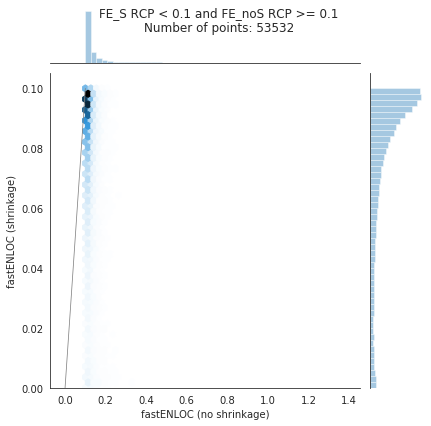

In [63]:
with sns.axes_style("white"):
    ax = sns.jointplot(data=df, x='fastENLOC (no shrinkage)', y='fastENLOC (shrinkage)', kind='hex')
#     ax.ax_joint.set_xlim([-0.01, 0.15])
#     ax.ax_joint.set_ylim([0.10, 1])
    ax.ax_joint.plot([0.0, 0.1], [0.0, 0.1], 'gray', linewidth=0.75)
    
    ax.fig.suptitle(f'FE_S RCP < 0.1 and FE_noS RCP >= 0.1\nNumber of points: {df.shape[0]}')